# Position classes visualization

1 | 2
--|--
3 | 4


In [2]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from dataloader.dataset import BaseDataset
from param import *
from util import bin_pos

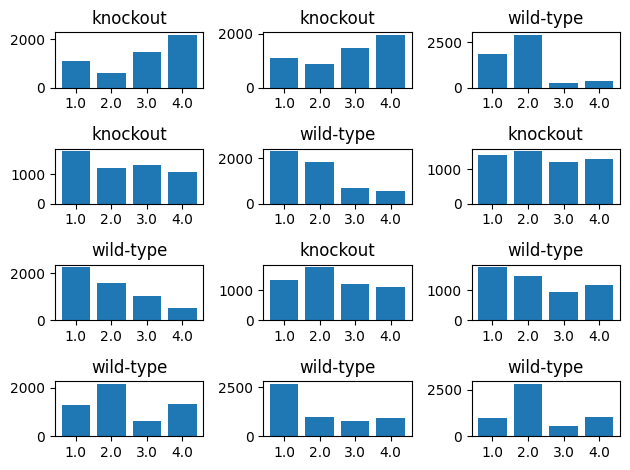

In [3]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, tight_layout = True)
axes = axes.ravel()

for id_, data_dir in enumerate(ParamDir().data_path_list):
    coord_axis = "x-axis"
    dataset = BaseDataset(data_dir, False, False)
    n_class = bin_pos(dataset.coords_xy)
    classes, count = np.unique(n_class, return_counts=True)
    axes[id_].bar((classes).astype(str), count)
    if "KO" in str(data_dir):
        mouse_type = "knockout"
    else:
        mouse_type = "wild-type"
    axes[id_].set_title(mouse_type)

## Upsampling using SMOTE

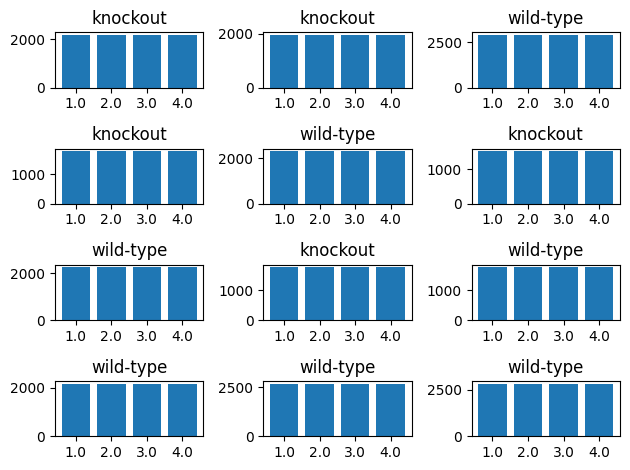

In [4]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, tight_layout = True)
axes = axes.ravel()

for id_, data_dir in enumerate(ParamDir().data_path_list):
    dataset = BaseDataset(data_dir, False, False)

    n_class = bin_pos(dataset.coords_xy)
    oversample = SMOTE()
    X, y = oversample.fit_resample(dataset.spikes, n_class)

    classes, count = np.unique(y, return_counts=True)
    axes[id_].bar((classes).astype(str), count)
    if "KO" in str(data_dir):
        mouse_type = "knockout"
    else:
        mouse_type = "wild-type"
    axes[id_].set_title(mouse_type)

## Downsample 

In [49]:
from sklearn.utils import resample

def downsample(X, y):
    classes, counts = np.unique(y, return_counts=True)
    classes_resample = classes[classes != classes[np.argmin(counts)]]
    count_min = np.min(counts)
    X_new = X[y==classes[np.argmin(counts)]]
    y_new = y[y==classes[np.argmin(counts)]]
    for c in classes_resample:
        X_tmp, y_tmp = resample(X[y==c], y[y==c], n_samples=count_min)
        X_new = np.vstack((X_new, X_tmp))
        y_new = np.append(y_new, y_tmp)
    return X_new, y_new
    


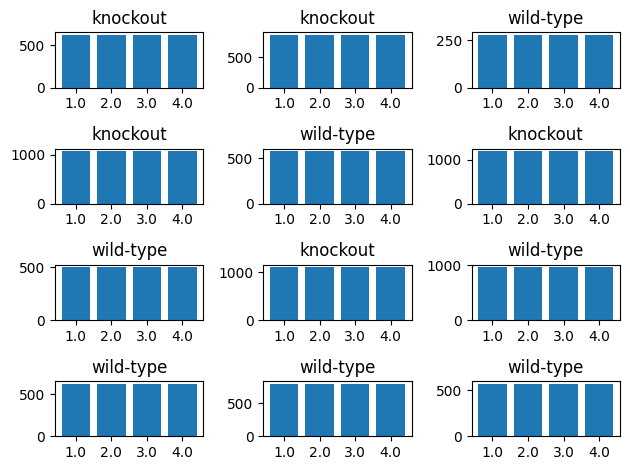

In [51]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, tight_layout = True)
axes = axes.ravel()

for id_, data_dir in enumerate(ParamDir().data_path_list):
    dataset = BaseDataset(data_dir, False, False)
    X, y = dataset.spikes, bin_pos(dataset.coords_xy)
    X_new, y_new = downsample(X, y)
    classes, count = np.unique(y_new, return_counts=True)
    axes[id_].bar((classes).astype(str), count)
    if "KO" in str(data_dir):
        mouse_type = "knockout"
    else:
        mouse_type = "wild-type"
    axes[id_].set_title(mouse_type)